In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import mahotas as mt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('NUMPY Version: {}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))
print('OPENCV Version: {}'.format(cv.__version__))
print('Mahotas Version: {}'.format(mt.__version__))
print('Seaborn version: {}'.format(sns.__version__))

NUMPY Version: 1.19.2
Pandas Version: 1.1.3
OPENCV Version: 3.4.1
Mahotas Version: 1.4.11
Seaborn version: 0.11.0


In [3]:
CURRENT_LOC = os.getcwd()

In [4]:
print(CURRENT_LOC)

C:\Users\alsrivas\Desktop\LEARN\Hackerearth-ML\Predict the condition and insurance amount


In [5]:
print(os.listdir(CURRENT_LOC))

['.ipynb_checkpoints', 'dataset', 'My_first.csv', 'My_second.csv', 'Version1.ipynb']


In [6]:
DATASET_LOC = os.path.join(CURRENT_LOC,'dataset')

In [7]:
print(os.listdir(DATASET_LOC))

['sample_submission.csv', 'test.csv', 'testImages', 'train.csv', 'trainImages']


In [8]:
TRAIN_DATASET = os.path.join(DATASET_LOC,'train.csv')
TEST_DATASET = os.path.join(DATASET_LOC,'test.csv')

### 1. READ TRAIN and TEST Datasets

In [9]:
train = pd.read_csv(TRAIN_DATASET)
test = pd.read_csv(TEST_DATASET)

In [10]:
print("TRAIN DATASET SHAPE: ", train.shape)
print("TRAIN DATASET ATTRIBUTES: ", list(train.columns))
print(end='\n\n')
print("TEST DATASET SHAPE: ", test.shape)
print("TEST DATASET ATTRIBUTES: ", list(test.columns))

TRAIN DATASET SHAPE:  (1399, 8)
TRAIN DATASET ATTRIBUTES:  ['Image_path', 'Insurance_company', 'Cost_of_vehicle', 'Min_coverage', 'Expiry_date', 'Max_coverage', 'Condition', 'Amount']


TEST DATASET SHAPE:  (600, 6)
TEST DATASET ATTRIBUTES:  ['Image_path', 'Insurance_company', 'Cost_of_vehicle', 'Min_coverage', 'Expiry_date', 'Max_coverage']


In [11]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


### Step 2: check for missing values in both Test and Train DataFrames

In [12]:
train.isna().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [13]:
test.isna().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
dtype: int64

In [14]:
train.isna().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [15]:
train[train['Amount'].isna()==True]['Condition']==0

107     False
148     False
449     False
461     False
468     False
482     False
525     False
734     False
842     False
1107    False
1398    False
Name: Condition, dtype: bool

In [16]:
train = train[~train['Amount'].isna()]

In [17]:
train.shape

(1388, 8)

In [18]:
train.isna().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      87
Min_coverage         87
Expiry_date           0
Max_coverage         87
Condition             0
Amount                0
dtype: int64

In [19]:
list(train[train['Max_coverage'].isna()==True].index.values) == list(train[train['Min_coverage'].isna()==True].index.values)

True

In [20]:
list(train[train['Cost_of_vehicle'].isna()==True].index.values) == list(train[train['Min_coverage'].isna()==True].index.values)

True

In [21]:
train[train['Max_coverage'].isna()==True]

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
8,img_7767281.jpg,DA,NaN,NaN,2028-06-07,NaN,1,513.0
13,img_7767681.jpg,DA,NaN,NaN,2026-05-28,NaN,1,7983.0
14,img_4536138.jpg,C,NaN,NaN,2022-01-12,NaN,1,6532.0
21,img_4636799.jpg,AC,NaN,NaN,2027-04-13,NaN,1,470.0
23,img_7768147.jpg,O,NaN,NaN,2024-08-21,NaN,1,7870.0
...,...,...,...,...,...,...,...,...
1250,img_4538123.jpg,O,NaN,NaN,2026-11-07,NaN,1,5775.0
1264,img_4635854.jpg,O,NaN,NaN,2028-02-17,NaN,1,395.0
1265,img_4514917.jpg,DA,NaN,NaN,2023-05-02,NaN,1,5922.0
1321,img_7765224.jpg,A,NaN,NaN,2025-11-21,NaN,1,2698.0


In [22]:
train = train[~train['Cost_of_vehicle'].isna()]

In [23]:
train.shape

(1301, 8)

In [24]:
train.isna().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
Amount               0
dtype: int64

In [25]:
test.isna().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
dtype: int64

### Step 3: Extract textural based features from images.

In [26]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [27]:
train.tail(10)

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
1388,img_4636459.jpg,BC,31500.0,787.5,2023-03-09,7953.0,1,487.0
1389,img_4635689.jpg,RE,34900.0,872.5,2025-10-16,8803.0,1,4906.0
1390,img_4514832.jpg,AA,27100.0,677.5,2022-11-01,6853.0,1,3070.0
1391,img_4518854.jpg,RE,45200.0,1130.0,2025-06-07,11378.0,1,7440.0
1392,img_4638768.jpg,AC,26100.0,652.5,2028-01-06,6603.0,1,621.0
1393,img_4535755.jpg,AC,51500.0,1287.5,2022-01-07,12953.0,1,4058.0
1394,img_4637237.jpg,DA,52300.0,1307.5,2025-02-17,13153.0,1,4565.0
1395,img_4637000.jpg,BQ,41500.0,1037.5,2023-12-30,10453.0,1,3363.0
1396,img_4637503.jpg,AA,31400.0,785.0,2022-11-25,7928.0,1,5336.0
1397,img_4515101.jpg,A,33200.0,830.0,2022-10-10,8378.0,1,8734.0


In [28]:
train = train.reset_index()

In [29]:
TRAIN_IMAGE_PATH = os.path.join(DATASET_LOC,'trainImages')
print(os.listdir(TRAIN_IMAGE_PATH))
os.chdir(TRAIN_IMAGE_PATH)

['img_4511041.jpg', 'img_4511208.jpg', 'img_4511569.jpg', 'img_4511760.jpg', 'img_451186.jpg', 'img_45123.jpg', 'img_4512307.jpg', 'img_4512529.jpg', 'img_4513009.jpg', 'img_4513058.jpg', 'img_451308.jpg', 'img_4513168.jpg', 'img_4513328.jpg', 'img_4513344.jpg', 'img_4513423.jpg', 'img_451397.jpg', 'img_4513976.jpg', 'img_4514159.jpg', 'img_4514501.jpg', 'img_4514527.jpg', 'img_4514532.jpg', 'img_4514546.jpg', 'img_4514547.jpg', 'img_4514561.jpg', 'img_4514588.jpg', 'img_4514598.jpg', 'img_4514603.jpg', 'img_4514606.jpg', 'img_4514612.jpg', 'img_4514629.jpg', 'img_4514646.jpg', 'img_4514648.jpg', 'img_4514653.jpg', 'img_4514658.jpg', 'img_4514663.jpg', 'img_4514696.jpg', 'img_4514709.jpg', 'img_4514715.jpg', 'img_4514720.jpg', 'img_4514749.jpg', 'img_4514751.jpg', 'img_4514772.jpg', 'img_4514779.jpg', 'img_4514786.jpg', 'img_4514832.jpg', 'img_4514864.jpg', 'img_4514893.jpg', 'img_4514894.jpg', 'img_451490.jpg', 'img_4514917.jpg', 'img_4514957.jpg', 'img_4514974.jpg', 'img_4514998.jpg'

In [30]:
image = cv.imread('img_4511041.jpg')

In [31]:
print('shape of an image {}, type of an image {}'.format(image.shape,type(image)))

shape of an image (187, 300, 3), type of an image <class 'numpy.ndarray'>


In [32]:
def extract_haralick(image):
    ##Texture Feature
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    textures = mt.features.haralick(gray)
    ht_mean = textures.mean(axis = 0)
    return(ht_mean)

In [33]:
extract_haralick(image)

array([ 6.47266558e-04,  2.24033181e+03,  7.27876287e-01,  4.11703897e+03,
        2.29558054e-01,  1.48968566e+02,  1.42278241e+04,  8.52978754e+00,
        1.32032117e+01,  2.11340019e-04,  5.61946853e+00, -2.51891430e-01,
        9.83776139e-01])

In [34]:
train = train.drop('index',axis=1)

In [35]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [36]:
image_feature = []
i=0
for index, row in train.iterrows():
    print(row['Image_path'],end=' ')
    image_feature.append(extract_haralick(cv.imread(row['Image_path'])))
    i += 1

img_4513976.jpg img_7764995.jpg img_451308.jpg img_7768372.jpg img_7765274.jpg img_4537770.jpg img_7765649.jpg img_4518199.jpg img_4638641.jpg img_4516058.jpg img_4518648.jpg img_7766913.jpg img_4518874.jpg img_4635293.jpg img_7765970.jpg img_7762199.jpg img_4535519.jpg img_7767990.jpg img_4632686.jpg img_4535509.jpg img_4535313.jpg img_4634520.jpg img_4637794.jpg img_4511760.jpg img_4638583.jpg img_7766747.jpg img_7767634.jpg img_4634006.jpg img_4635315.jpg img_4514720.jpg img_4516826.jpg img_4634526.jpg img_7766892.jpg img_4517202.jpg img_4636586.jpg img_4515867.jpg img_7767424.jpg img_7768927.jpg img_4535185.jpg img_4515236.jpg img_4636599.jpg img_4516363.jpg img_4534505.jpg img_7765429.jpg img_4537743.jpg img_4535263.jpg img_4538633.jpg img_7765969.jpg img_4517623.jpg img_4537170.jpg img_4534867.jpg img_4516954.jpg img_7766040.jpg img_4536981.jpg img_4638321.jpg img_7765387.jpg img_4638960.jpg img_7766299.jpg img_4636575.jpg img_4535665.jpg img_4537837.jpg img_4516490.jpg img_46348

img_4635195.jpg img_4636122.jpg img_4632362.jpg img_45123.jpg img_4538687.jpg img_7764922.jpg img_4538113.jpg img_4516897.jpg img_7768859.jpg img_4635087.jpg img_4516074.jpg img_7766535.jpg img_4516228.jpg img_4535497.jpg img_4635396.jpg img_4635617.jpg img_7764941.jpg img_4635806.jpg img_4635250.jpg img_4635465.jpg img_4538918.jpg img_7767844.jpg img_4534982.jpg img_4634748.jpg img_4537024.jpg img_4517954.jpg img_4538959.jpg img_4535364.jpg img_7766726.jpg img_4637693.jpg img_4538234.jpg img_7768274.jpg img_4537244.jpg img_4536890.jpg img_7765484.jpg img_4518573.jpg img_4636681.jpg img_7768476.jpg img_4535209.jpg img_4534823.jpg img_7765498.jpg img_7764807.jpg img_4635642.jpg img_7767840.jpg img_4536915.jpg img_7765840.jpg img_4535834.jpg img_4636484.jpg img_4518126.jpg img_4631479.jpg img_4517650.jpg img_7767519.jpg img_7764785.jpg img_7763870.jpg img_4638904.jpg img_4635200.jpg img_4536746.jpg img_4537605.jpg img_4516489.jpg img_4635622.jpg img_4635898.jpg img_4538486.jpg img_453539

 img_7764681.jpg img_7766618.jpg img_7765929.jpg img_7768974.jpg img_4518976.jpg img_4636487.jpg img_4536642.jpg img_4536062.jpg img_4517377.jpg img_4637205.jpg img_4636027.jpg img_4636763.jpg img_7769000.jpg img_4537262.jpg img_4537961.jpg img_7766934.jpg img_4538773.jpg img_7766198.jpg img_7765921.jpg img_451799.jpg img_4636065.jpg img_4517037.jpg img_4637313.jpg img_4635305.jpg img_4516142.jpg img_4636924.jpg img_4538491.jpg img_4515238.jpg img_4534991.jpg img_7765008.jpg img_4536853.jpg img_4517828.jpg img_4517867.jpg img_4638816.jpg img_7766492.jpg img_4518887.jpg img_4518055.jpg img_4636546.jpg img_4515772.jpg img_7766611.jpg img_4518280.jpg img_7764686.jpg img_4532276.jpg img_4538000.jpg img_4535097.jpg img_4537039.jpg img_4535435.jpg img_4515058.jpg img_4536983.jpg img_4636081.jpg img_4534672.jpg img_7764804.jpg img_4638449.jpg img_4516834.jpg img_4537896.jpg img_4636849.jpg img_7765503.jpg img_4637735.jpg img_4635183.jpg img_4514527.jpg img_4514894.jpg img_4537128.jpg img_4537

In [37]:
train.tail()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
1296,img_4535755.jpg,AC,51500.0,1287.5,2022-01-07,12953.0,1,4058.0
1297,img_4637237.jpg,DA,52300.0,1307.5,2025-02-17,13153.0,1,4565.0
1298,img_4637000.jpg,BQ,41500.0,1037.5,2023-12-30,10453.0,1,3363.0
1299,img_4637503.jpg,AA,31400.0,785.0,2022-11-25,7928.0,1,5336.0
1300,img_4515101.jpg,A,33200.0,830.0,2022-10-10,8378.0,1,8734.0


In [38]:
image_feature = np.transpose(image_feature)
print(len(image_feature))

13


In [39]:
print(len(image_feature[0]))

1301


In [40]:
print(type(image_feature[0]))

<class 'numpy.ndarray'>


In [41]:
HEADER = ['energy','contrast','correlation','variance','inverse difference moment','sum average','sum variance', 
          'sum entropy','entropy','difference variance','difference entropy','info_corr','maximal_corr_coeff']
Feature_list = {}
i=0
for feature in HEADER:
    train[feature] = image_feature[i].tolist()
    i += 1

In [42]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount,energy,contrast,...,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0,0.000236,565.744709,...,6096.412275,0.197763,250.326950,23819.904390,8.902012,13.440002,0.000222,4.879668,-0.299620,0.994696
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0,0.001950,66.767523,...,4287.254128,0.366505,291.455147,17082.248990,8.378480,11.326705,0.000528,3.559293,-0.469178,0.999366
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0,0.000816,29.814763,...,3676.495646,0.438601,230.406154,14676.167821,8.716252,11.467497,0.000719,3.146063,-0.518096,0.999767
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0,0.004774,222.253400,...,4166.680548,0.351815,201.814955,16444.468793,8.466251,12.078940,0.000425,4.089201,-0.389869,0.998286
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0,0.001548,105.839760,...,1268.309340,0.283843,270.214352,4967.397599,7.464594,11.022848,0.000458,3.864858,-0.303799,0.988885


In [43]:
train = train.drop('Image_path',axis=1)

In [44]:
train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff
0,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0,0.000236,565.744709,0.953603,6096.412275,0.197763,250.326950,23819.904390,8.902012,13.440002,0.000222,4.879668,-0.299620,0.994696
1,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0,0.001950,66.767523,0.992215,4287.254128,0.366505,291.455147,17082.248990,8.378480,11.326705,0.000528,3.559293,-0.469178,0.999366
2,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0,0.000816,29.814763,0.995945,3676.495646,0.438601,230.406154,14676.167821,8.716252,11.467497,0.000719,3.146063,-0.518096,0.999767
3,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0,0.004774,222.253400,0.973326,4166.680548,0.351815,201.814955,16444.468793,8.466251,12.078940,0.000425,4.089201,-0.389869,0.998286
4,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0,0.001548,105.839760,0.958213,1268.309340,0.283843,270.214352,4967.397599,7.464594,11.022848,0.000458,3.864858,-0.303799,0.988885


In [45]:
os.chdir(CURRENT_LOC)

In [46]:
TRAIN_IMAGE_PATH = os.path.join(DATASET_LOC,'testImages')
os.chdir(TRAIN_IMAGE_PATH)

In [47]:
image_feature_test = []
i=0
for index, row in test.iterrows():
    #print(row['Image_path'],end=' ')
    image_feature_test.append(extract_haralick(cv.imread(row['Image_path'])))
    i += 1

In [48]:
image_feature_test = np.transpose(image_feature_test)
print(len(image_feature_test),len(image_feature_test[0]))

13 600


In [49]:
i=0
for feature in HEADER:
    test[feature] = image_feature_test[i].tolist()
    i += 1

In [50]:
print("Train DATASET shape: {}".format(train.shape))
print("Test DATASET shape: {}".format(test.shape))

Train DATASET shape: (1301, 20)
Test DATASET shape: (600, 19)


In [51]:
test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0,0.001477,654.826743,0.948814,6396.781658,0.319089,184.959457,24932.299888,8.613059,12.317904,0.000355,4.550926,-0.382139,0.998335
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0,0.009060,324.454262,0.976505,6904.895728,0.362984,177.955098,27295.128650,8.260946,11.716470,0.000438,4.156768,-0.397488,0.998354
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0,0.001385,16.170430,0.994268,1410.590218,0.367106,267.549308,5626.190442,7.944276,10.666843,0.000768,3.069658,-0.467338,0.999145
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0,0.011060,330.895511,0.976331,6989.236376,0.305744,311.674178,27626.049993,8.193888,11.896729,0.000315,4.577393,-0.372926,0.997576
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0,0.006502,39.629449,0.988315,1697.001236,0.701176,292.217796,6748.375497,7.554898,9.126721,0.001796,2.131943,-0.651793,0.999918


In [52]:
train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff
0,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0,0.000236,565.744709,0.953603,6096.412275,0.197763,250.326950,23819.904390,8.902012,13.440002,0.000222,4.879668,-0.299620,0.994696
1,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0,0.001950,66.767523,0.992215,4287.254128,0.366505,291.455147,17082.248990,8.378480,11.326705,0.000528,3.559293,-0.469178,0.999366
2,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0,0.000816,29.814763,0.995945,3676.495646,0.438601,230.406154,14676.167821,8.716252,11.467497,0.000719,3.146063,-0.518096,0.999767
3,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0,0.004774,222.253400,0.973326,4166.680548,0.351815,201.814955,16444.468793,8.466251,12.078940,0.000425,4.089201,-0.389869,0.998286
4,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0,0.001548,105.839760,0.958213,1268.309340,0.283843,270.214352,4967.397599,7.464594,11.022848,0.000458,3.864858,-0.303799,0.988885


### Step 4 : Statistical Analysis for both Test and Train Dataset
* Date Handling: (Expiry_date - current_timestamp).
* One-hot_encoding of Insurance Company.
* Standard Scaling on image Features.
#### Contribution and effect of each feature on labels

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Insurance_company          1301 non-null   object 
 1   Cost_of_vehicle            1301 non-null   float64
 2   Min_coverage               1301 non-null   float64
 3   Expiry_date                1301 non-null   object 
 4   Max_coverage               1301 non-null   float64
 5   Condition                  1301 non-null   int64  
 6   Amount                     1301 non-null   float64
 7   energy                     1301 non-null   float64
 8   contrast                   1301 non-null   float64
 9   correlation                1301 non-null   float64
 10  variance                   1301 non-null   float64
 11  inverse difference moment  1301 non-null   float64
 12  sum average                1301 non-null   float64
 13  sum variance               1301 non-null   float

In [54]:
train.columns

Index(['Insurance_company', 'Cost_of_vehicle', 'Min_coverage', 'Expiry_date',
       'Max_coverage', 'Condition', 'Amount', 'energy', 'contrast',
       'correlation', 'variance', 'inverse difference moment', 'sum average',
       'sum variance', 'sum entropy', 'entropy', 'difference variance',
       'difference entropy', 'info_corr', 'maximal_corr_coeff'],
      dtype='object')

In [55]:
type(train['Expiry_date'][0])

str

In [56]:
WARRANTY_PERIOD = ((pd.to_datetime(train['Expiry_date'],format='%Y-%m-%d') - pd.Timestamp.now())/np.timedelta64(1, 'D')).astype('int')
type(WARRANTY_PERIOD)

pandas.core.series.Series

In [57]:
type(WARRANTY_PERIOD[0])

numpy.int32

In [58]:
WARRANTY_PERIOD[0]

1995

In [59]:
train['WARRANTY_PERIOD'] = WARRANTY_PERIOD

In [60]:
test['WARRANTY_PERIOD'] = ((pd.to_datetime(test['Expiry_date'],format='%Y-%m-%d') - pd.Timestamp.now())/np.timedelta64(1, 'D')).astype('int')

In [61]:
train = train.drop('Expiry_date',axis=1)
test = test.drop('Expiry_date',axis=1)

In [62]:
train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff,WARRANTY_PERIOD
0,BQ,41500.0,1037.5,36142.68,0,0.0,0.000236,565.744709,0.953603,6096.412275,0.197763,250.326950,23819.904390,8.902012,13.440002,0.000222,4.879668,-0.299620,0.994696,1995
1,BQ,50700.0,1267.5,12753.00,1,6194.0,0.001950,66.767523,0.992215,4287.254128,0.366505,291.455147,17082.248990,8.378480,11.326705,0.000528,3.559293,-0.469178,0.999366,1484
2,A,49500.0,1237.5,43102.68,0,0.0,0.000816,29.814763,0.995945,3676.495646,0.438601,230.406154,14676.167821,8.716252,11.467497,0.000719,3.146063,-0.518096,0.999767,420
3,A,33500.0,837.5,8453.00,1,7699.0,0.004774,222.253400,0.973326,4166.680548,0.351815,201.814955,16444.468793,8.466251,12.078940,0.000425,4.089201,-0.389869,0.998286,411
4,AC,27600.0,690.0,6978.00,1,8849.0,0.001548,105.839760,0.958213,1268.309340,0.283843,270.214352,4967.397599,7.464594,11.022848,0.000458,3.864858,-0.303799,0.988885,1779


In [63]:
test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff,WARRANTY_PERIOD
0,img_4538519.jpg,B,23600,590.0,5978.0,0.001477,654.826743,0.948814,6396.781658,0.319089,184.959457,24932.299888,8.613059,12.317904,0.000355,4.550926,-0.382139,0.998335,1395
1,img_7766002.jpg,C,28300,707.5,7153.0,0.009060,324.454262,0.976505,6904.895728,0.362984,177.955098,27295.128650,8.260946,11.716470,0.000438,4.156768,-0.397488,0.998354,2625
2,img_4637390.jpg,AC,43700,1092.5,11003.0,0.001385,16.170430,0.994268,1410.590218,0.367106,267.549308,5626.190442,7.944276,10.666843,0.000768,3.069658,-0.467338,0.999145,894
3,img_4516108.jpg,BB,46100,1152.5,11603.0,0.011060,330.895511,0.976331,6989.236376,0.305744,311.674178,27626.049993,8.193888,11.896729,0.000315,4.577393,-0.372926,0.997576,2423
4,img_4517008.jpg,BB,40700,1017.5,10253.0,0.006502,39.629449,0.988315,1697.001236,0.701176,292.217796,6748.375497,7.554898,9.126721,0.001796,2.131943,-0.651793,0.999918,200


In [64]:
Insurance_company = train['Insurance_company']

In [65]:
train = train.drop('Insurance_company',axis=1)
Insurance_company_test = test['Insurance_company']
test = test.drop('Insurance_company',axis=1)

In [66]:
train.shape

(1301, 19)

In [67]:
test.shape

(600, 18)

In [68]:
TEST_IMAGE_PATH=test['Image_path']

In [69]:
test = test.drop('Image_path',axis=1)

In [70]:
test.shape

(600, 17)

In [71]:
test.columns

Index(['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'energy', 'contrast',
       'correlation', 'variance', 'inverse difference moment', 'sum average',
       'sum variance', 'sum entropy', 'entropy', 'difference variance',
       'difference entropy', 'info_corr', 'maximal_corr_coeff',
       'WARRANTY_PERIOD'],
      dtype='object')

In [72]:
train.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff,WARRANTY_PERIOD
0,41500.0,1037.5,36142.68,0,0.0,0.000236,565.744709,0.953603,6096.412275,0.197763,250.326950,23819.904390,8.902012,13.440002,0.000222,4.879668,-0.299620,0.994696,1995
1,50700.0,1267.5,12753.00,1,6194.0,0.001950,66.767523,0.992215,4287.254128,0.366505,291.455147,17082.248990,8.378480,11.326705,0.000528,3.559293,-0.469178,0.999366,1484
2,49500.0,1237.5,43102.68,0,0.0,0.000816,29.814763,0.995945,3676.495646,0.438601,230.406154,14676.167821,8.716252,11.467497,0.000719,3.146063,-0.518096,0.999767,420
3,33500.0,837.5,8453.00,1,7699.0,0.004774,222.253400,0.973326,4166.680548,0.351815,201.814955,16444.468793,8.466251,12.078940,0.000425,4.089201,-0.389869,0.998286,411
4,27600.0,690.0,6978.00,1,8849.0,0.001548,105.839760,0.958213,1268.309340,0.283843,270.214352,4967.397599,7.464594,11.022848,0.000458,3.864858,-0.303799,0.988885,1779


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scalar = StandardScaler()

In [75]:
Condition = train['Condition']
Amount = train['Amount']
train = train.drop('Amount',axis=1)
train = train.drop('Condition',axis=1)

In [76]:
train.shape

(1301, 17)

In [77]:
train = scalar.fit_transform(train)

In [78]:
train.shape

(1301, 17)

In [79]:
test.shape

(600, 17)

In [80]:
test = scalar.transform(test)

In [81]:
test.shape

(600, 17)

In [82]:
train = np.transpose(train)
test = np.transpose(test)

In [83]:
train.shape

(17, 1301)

In [84]:
ATTRIBUTE = ['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'energy', 'contrast',
       'correlation', 'variance', 'inverse difference moment', 'sum average',
       'sum variance', 'sum entropy', 'entropy', 'difference variance',
       'difference entropy', 'info_corr', 'maximal_corr_coeff',
       'WARRANTY_PERIOD']

In [85]:
len(ATTRIBUTE)

17

In [86]:
train_dict = {}
test_dict = {}
i=0
for attr in ATTRIBUTE:
    train_dict[attr] = pd.Series(train[i])
    test_dict[attr] = pd.Series(test[i])
    i += 1

In [87]:
train_dict['Cost_of_vehicle'].shape

(1301,)

In [88]:
TRAIN_DATAFRAME = pd.DataFrame.from_dict(train_dict)
TEST_DATAFRAME = pd.DataFrame.from_dict(test_dict)

In [89]:
TRAIN_DATAFRAME.shape

(1301, 17)

In [90]:
TEST_DATAFRAME.shape

(600, 17)

In [91]:
TRAIN_DATAFRAME.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff,WARRANTY_PERIOD
0,0.451768,0.451768,3.465368,-0.259399,0.235741,0.146016,1.170638,-0.822450,0.109269,1.172388,0.940359,1.015981,-0.693199,0.650261,0.633428,0.147934,0.694708
1,1.483694,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.270986,0.800932,0.249169,0.251533,-0.301947,0.081073,-0.633811,-0.767346,0.289924,0.036958
2,1.349095,1.349095,4.434672,-0.245936,-0.696581,0.738371,-0.133078,0.738159,-0.225743,-0.080521,0.695950,-0.214145,0.564911,-1.035680,-1.171469,0.302113,-1.332603
3,-0.445560,-0.445560,-0.390911,-0.154017,-0.361808,0.421934,0.131006,0.175796,-0.706569,0.161778,0.367016,0.167173,-0.178268,-0.118472,-0.112141,0.257091,-1.344188
4,-1.107339,-1.107339,-0.596330,-0.228939,-0.564325,0.210507,-1.430475,-0.264658,0.443721,-1.410854,-0.950894,-0.491443,-0.095562,-0.336647,0.598905,-0.028703,0.416677


In [92]:
TEST_DATAFRAME.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,difference entropy,info_corr,maximal_corr_coeff,WARRANTY_PERIOD
0,-1.556003,-1.556003,-0.735598,-0.230587,0.390712,0.079014,1.332461,-0.036266,-0.990032,1.324813,0.560175,0.316200,-0.356596,0.330558,-0.048280,0.258567,-0.077601
1,-1.028823,-1.028823,-0.571959,-0.054479,-0.184016,0.466408,1.606204,0.248164,-1.107826,1.648577,0.096890,-0.058876,-0.145716,-0.052763,-0.175090,0.259161,1.505632
2,0.698533,0.698533,-0.035778,-0.232724,-0.720317,0.714901,-1.353822,0.274881,0.398902,-1.320584,-0.319761,-0.713461,0.689536,-1.109983,-0.752139,0.283206,-0.722479
3,0.967731,0.967731,0.047783,-0.008031,-0.172810,0.463967,1.651642,-0.122745,1.140961,1.693921,0.008659,0.053540,-0.456724,0.356297,0.027823,0.235505,1.245622
4,0.362035,0.362035,-0.140229,-0.113876,-0.679507,0.631629,-1.199520,2.439618,0.813758,-1.166818,-0.832078,-1.673936,3.294794,-2.021916,-2.275982,0.306707,-1.615783


In [93]:
TRAIN_DATAFRAME['Insurance_company'] = Insurance_company
TEST_DATAFRAME['Insurance_company'] = Insurance_company_test

In [94]:
TRAIN_DATAFRAME.shape

(1301, 18)

In [95]:
TRAIN_DATAFRAME = pd.get_dummies(TRAIN_DATAFRAME,drop_first=True)

In [96]:
TRAIN_DATAFRAME.shape

(1301, 27)

In [97]:
TEST_DATAFRAME.shape

(600, 18)

In [98]:
TEST_DATAFRAME = pd.get_dummies(TEST_DATAFRAME,drop_first=True)

In [99]:
TEST_DATAFRAME.shape

(600, 27)

In [100]:
TEST_DATAFRAME.columns

Index(['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'energy', 'contrast',
       'correlation', 'variance', 'inverse difference moment', 'sum average',
       'sum variance', 'sum entropy', 'entropy', 'difference variance',
       'difference entropy', 'info_corr', 'maximal_corr_coeff',
       'WARRANTY_PERIOD', 'Insurance_company_AA', 'Insurance_company_AC',
       'Insurance_company_B', 'Insurance_company_BB', 'Insurance_company_BC',
       'Insurance_company_BQ', 'Insurance_company_C', 'Insurance_company_DA',
       'Insurance_company_O', 'Insurance_company_RE'],
      dtype='object')

In [101]:
TRAIN_DATAFRAME.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,...,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,0.451768,0.451768,3.465368,-0.259399,0.235741,0.146016,1.170638,-0.822450,0.109269,1.172388,...,0,0,0,0,0,1,0,0,0,0
1,1.483694,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.270986,0.800932,0.249169,...,0,0,0,0,0,1,0,0,0,0
2,1.349095,1.349095,4.434672,-0.245936,-0.696581,0.738371,-0.133078,0.738159,-0.225743,-0.080521,...,0,0,0,0,0,0,0,0,0,0
3,-0.445560,-0.445560,-0.390911,-0.154017,-0.361808,0.421934,0.131006,0.175796,-0.706569,0.161778,...,0,0,0,0,0,0,0,0,0,0
4,-1.107339,-1.107339,-0.596330,-0.228939,-0.564325,0.210507,-1.430475,-0.264658,0.443721,-1.410854,...,0,1,0,0,0,0,0,0,0,0


In [102]:
TEST_DATAFRAME.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,...,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,-1.556003,-1.556003,-0.735598,-0.230587,0.390712,0.079014,1.332461,-0.036266,-0.990032,1.324813,...,0,0,1,0,0,0,0,0,0,0
1,-1.028823,-1.028823,-0.571959,-0.054479,-0.184016,0.466408,1.606204,0.248164,-1.107826,1.648577,...,0,0,0,0,0,0,1,0,0,0
2,0.698533,0.698533,-0.035778,-0.232724,-0.720317,0.714901,-1.353822,0.274881,0.398902,-1.320584,...,0,1,0,0,0,0,0,0,0,0
3,0.967731,0.967731,0.047783,-0.008031,-0.172810,0.463967,1.651642,-0.122745,1.140961,1.693921,...,0,0,0,1,0,0,0,0,0,0
4,0.362035,0.362035,-0.140229,-0.113876,-0.679507,0.631629,-1.199520,2.439618,0.813758,-1.166818,...,0,0,0,1,0,0,0,0,0,0


In [103]:
TRAIN_DATAFRAME['Condition'] = Condition
TRAIN_DATAFRAME['Amount'] = Amount

In [104]:
TRAIN_DATAFRAME.shape

(1301, 29)

#### Feature Selection and Visualization

In [105]:
TRAIN_DATAFRAME.columns

Index(['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'energy', 'contrast',
       'correlation', 'variance', 'inverse difference moment', 'sum average',
       'sum variance', 'sum entropy', 'entropy', 'difference variance',
       'difference entropy', 'info_corr', 'maximal_corr_coeff',
       'WARRANTY_PERIOD', 'Insurance_company_AA', 'Insurance_company_AC',
       'Insurance_company_B', 'Insurance_company_BB', 'Insurance_company_BC',
       'Insurance_company_BQ', 'Insurance_company_C', 'Insurance_company_DA',
       'Insurance_company_O', 'Insurance_company_RE', 'Condition', 'Amount'],
      dtype='object')

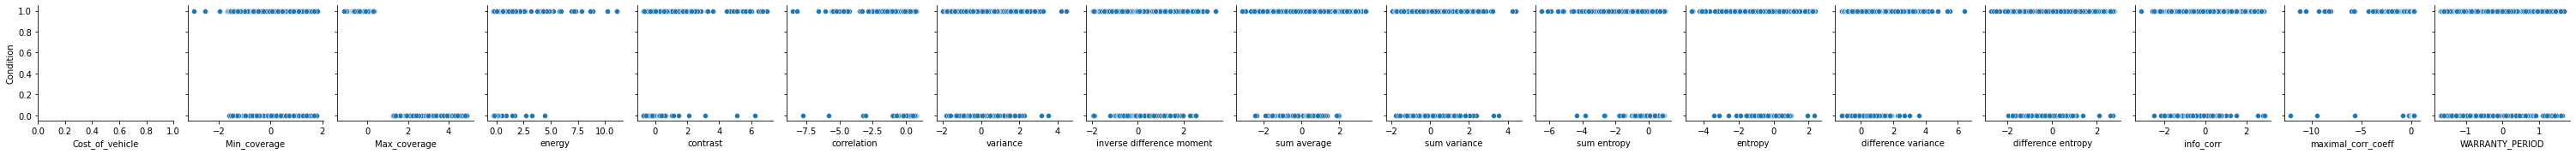

In [106]:
pp = sns.pairplot(data=TRAIN_DATAFRAME,
                  y_vars=['Condition'],
                  x_vars=['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'energy', 'contrast',
                          'correlation','variance','inverse difference moment','sum average','sum variance',
                          'sum entropy','entropy','difference variance','difference entropy','info_corr',
                          'maximal_corr_coeff','WARRANTY_PERIOD'])

Text(0.5, 1.0, 'Correlation between features')

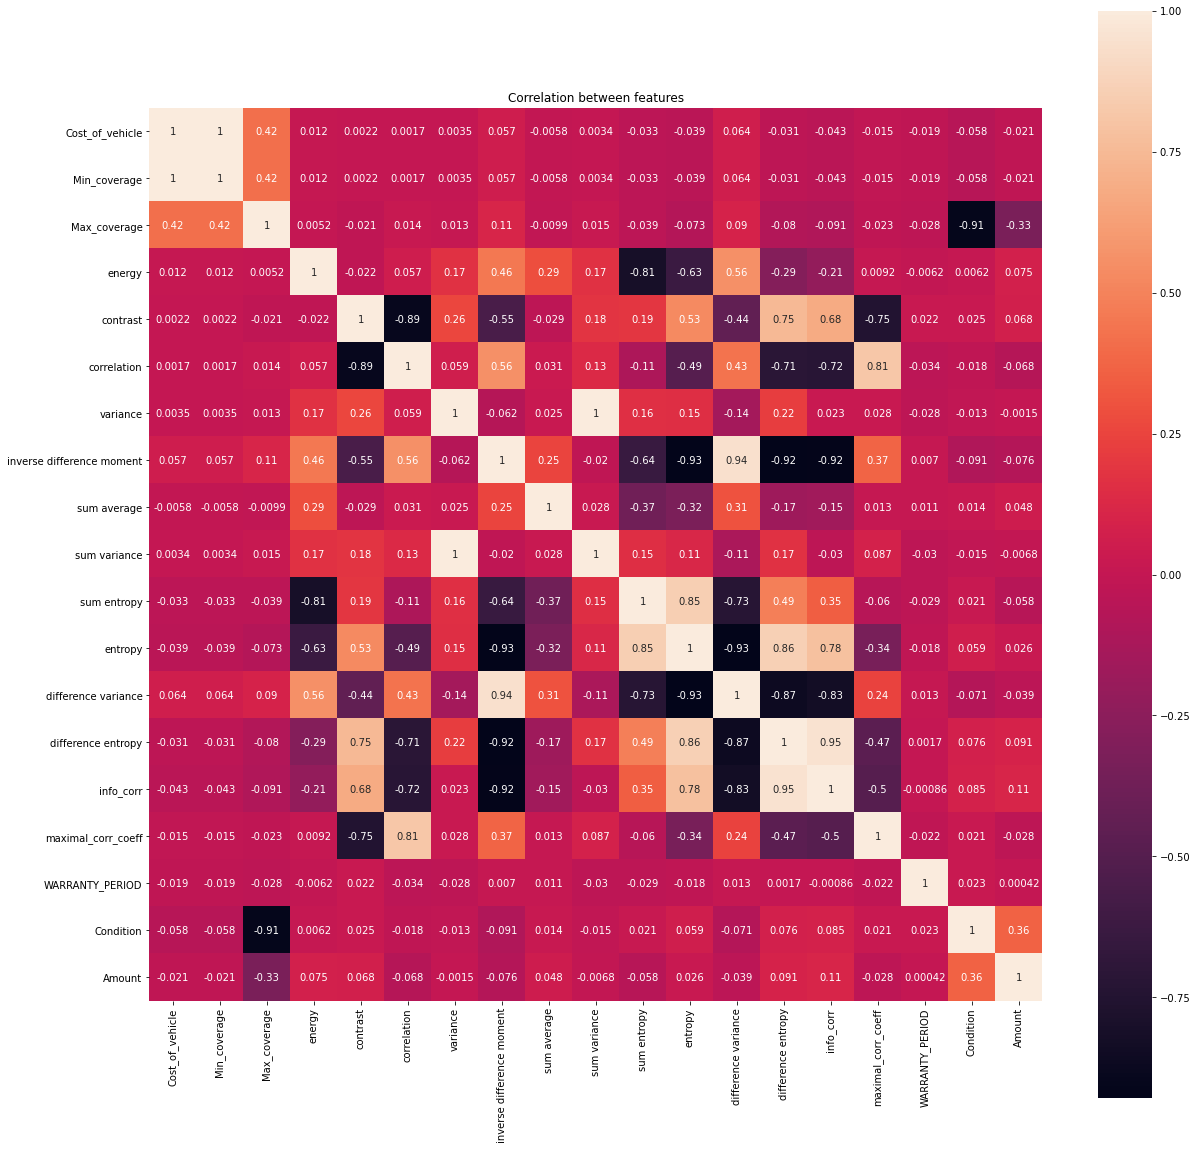

In [107]:
HEADERS = ['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'energy', 'contrast',
           'correlation', 'variance', 'inverse difference moment', 'sum average',
           'sum variance', 'sum entropy', 'entropy', 'difference variance',
           'difference entropy', 'info_corr', 'maximal_corr_coeff',
           'WARRANTY_PERIOD','Condition', 'Amount']
plt.figure(figsize=(20,20))
sns.heatmap(TRAIN_DATAFRAME[HEADERS].corr(), 
            xticklabels=HEADERS,
            yticklabels=HEADERS, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [108]:
HEADERS

['Cost_of_vehicle',
 'Min_coverage',
 'Max_coverage',
 'energy',
 'contrast',
 'correlation',
 'variance',
 'inverse difference moment',
 'sum average',
 'sum variance',
 'sum entropy',
 'entropy',
 'difference variance',
 'difference entropy',
 'info_corr',
 'maximal_corr_coeff',
 'WARRANTY_PERIOD',
 'Condition',
 'Amount']

* ('Cost_of_vehicle', 'Min_coverage') --- > DROP COST_of_VEHICLE(100% correlated)
* ('variance','sum variance') --- > DROP SUM_VARIANCE(100% correlated)
* ('entropy', 'sum_entropy') ---- > DROP SUM_ENTROPY(85% correlated)
* ('maximal_corr_coeff','correlation')  --- > DROP maximal_corr_coeff(85% correlated)
* ('inverse difference moment', 'difference variance') ---> DROP inverse difference moment(95% correlated)
* ('difference entropy', 'info_corr') --- > DROP difference entropy(95% correlated)

In [109]:
TRAIN_DATAFRAME.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,...,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
0,0.451768,0.451768,3.465368,-0.259399,0.235741,0.146016,1.170638,-0.822450,0.109269,1.172388,...,0,0,0,1,0,0,0,0,0,0.0
1,1.483694,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.270986,0.800932,0.249169,...,0,0,0,1,0,0,0,0,1,6194.0
2,1.349095,1.349095,4.434672,-0.245936,-0.696581,0.738371,-0.133078,0.738159,-0.225743,-0.080521,...,0,0,0,0,0,0,0,0,0,0.0
3,-0.445560,-0.445560,-0.390911,-0.154017,-0.361808,0.421934,0.131006,0.175796,-0.706569,0.161778,...,0,0,0,0,0,0,0,0,1,7699.0
4,-1.107339,-1.107339,-0.596330,-0.228939,-0.564325,0.210507,-1.430475,-0.264658,0.443721,-1.410854,...,0,0,0,0,0,0,0,0,1,8849.0


In [110]:
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('Cost_of_vehicle',axis=1)
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('sum variance',axis=1)
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('sum entropy',axis=1)
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('maximal_corr_coeff',axis=1)
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('inverse difference moment',axis=1)
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('difference entropy',axis=1)

In [111]:
TEST_DATAFRAME.shape

(600, 27)

In [112]:
TEST_DATAFRAME = TEST_DATAFRAME.drop('Cost_of_vehicle',axis=1)
TEST_DATAFRAME = TEST_DATAFRAME.drop('sum variance',axis=1)
TEST_DATAFRAME = TEST_DATAFRAME.drop('sum entropy',axis=1)
TEST_DATAFRAME = TEST_DATAFRAME.drop('maximal_corr_coeff',axis=1)
TEST_DATAFRAME = TEST_DATAFRAME.drop('inverse difference moment',axis=1)
TEST_DATAFRAME = TEST_DATAFRAME.drop('difference entropy',axis=1)

In [113]:
TEST_DATAFRAME.shape

(600, 21)

In [114]:
TEST_DATAFRAME.head()

,Min_coverage,Max_coverage,energy,contrast,correlation,variance,sum average,entropy,difference variance,info_corr,...,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,-1.556003,-0.735598,-0.230587,0.390712,0.079014,1.332461,-0.990032,0.316200,-0.356596,-0.048280,...,0,0,1,0,0,0,0,0,0,0
1,-1.028823,-0.571959,-0.054479,-0.184016,0.466408,1.606204,-1.107826,-0.058876,-0.145716,-0.175090,...,0,0,0,0,0,0,1,0,0,0
2,0.698533,-0.035778,-0.232724,-0.720317,0.714901,-1.353822,0.398902,-0.713461,0.689536,-0.752139,...,0,1,0,0,0,0,0,0,0,0
3,0.967731,0.047783,-0.008031,-0.172810,0.463967,1.651642,1.140961,0.053540,-0.456724,0.027823,...,0,0,0,1,0,0,0,0,0,0
4,0.362035,-0.140229,-0.113876,-0.679507,0.631629,-1.199520,0.813758,-1.673936,3.294794,-2.275982,...,0,0,0,1,0,0,0,0,0,0


In [115]:
TRAIN_DATAFRAME.head()

,Min_coverage,Max_coverage,energy,contrast,correlation,variance,sum average,entropy,difference variance,info_corr,...,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
0,0.451768,3.465368,-0.259399,0.235741,0.146016,1.170638,0.109269,1.015981,-0.693199,0.633428,...,0,0,0,1,0,0,0,0,0,0.0
1,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.800932,-0.301947,0.081073,-0.767346,...,0,0,0,1,0,0,0,0,1,6194.0
2,1.349095,4.434672,-0.245936,-0.696581,0.738371,-0.133078,-0.225743,-0.214145,0.564911,-1.171469,...,0,0,0,0,0,0,0,0,0,0.0
3,-0.445560,-0.390911,-0.154017,-0.361808,0.421934,0.131006,-0.706569,0.167173,-0.178268,-0.112141,...,0,0,0,0,0,0,0,0,1,7699.0
4,-1.107339,-0.596330,-0.228939,-0.564325,0.210507,-1.430475,0.443721,-0.491443,-0.095562,0.598905,...,0,0,0,0,0,0,0,0,1,8849.0


####  Shuffle the TRAIN Dataset:

In [116]:
TRAIN_DATAFRAME = TRAIN_DATAFRAME.sample(frac=1)

In [117]:
TRAIN_DATAFRAME.head()

,Min_coverage,Max_coverage,energy,contrast,correlation,variance,sum average,entropy,difference variance,info_corr,...,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
322,-1.578436,-0.742562,-0.241698,0.337478,-0.630035,-0.463363,0.428764,0.540566,-0.648101,0.505957,...,0,0,0,0,0,0,0,1,1,5585.0
1076,0.474201,-0.105412,-0.121838,-0.400171,0.450175,0.073507,-1.798426,-0.040817,-0.200849,0.036338,...,0,0,0,0,0,0,0,0,1,4353.0
1,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.800932,-0.301947,0.081073,-0.767346,...,0,0,0,1,0,0,0,0,1,6194.0
368,-0.927874,-0.540623,-0.254138,0.174012,-0.914608,-0.945268,-0.259782,0.480704,-0.578456,0.789690,...,0,0,0,0,0,0,0,0,1,2360.0
120,0.799482,-0.004443,5.781703,-0.402690,0.621803,2.207723,2.216030,-3.167906,2.681821,-0.896703,...,0,1,0,0,0,0,0,0,1,7569.0


In [118]:
TRAIN_DATAFRAME.reset_index(inplace=True)

In [119]:
TRAIN_DATAFRAME.head()

,index,Min_coverage,Max_coverage,energy,contrast,correlation,variance,sum average,entropy,difference variance,...,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
0,322,-1.578436,-0.742562,-0.241698,0.337478,-0.630035,-0.463363,0.428764,0.540566,-0.648101,...,0,0,0,0,0,0,0,1,1,5585.0
1,1076,0.474201,-0.105412,-0.121838,-0.400171,0.450175,0.073507,-1.798426,-0.040817,-0.200849,...,0,0,0,0,0,0,0,0,1,4353.0
2,1,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.800932,-0.301947,0.081073,...,0,0,0,1,0,0,0,0,1,6194.0
3,368,-0.927874,-0.540623,-0.254138,0.174012,-0.914608,-0.945268,-0.259782,0.480704,-0.578456,...,0,0,0,0,0,0,0,0,1,2360.0
4,120,0.799482,-0.004443,5.781703,-0.402690,0.621803,2.207723,2.216030,-3.167906,2.681821,...,0,1,0,0,0,0,0,0,1,7569.0


In [120]:
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('index',axis=1)

In [121]:
TRAIN_DATAFRAME.head()

,Min_coverage,Max_coverage,energy,contrast,correlation,variance,sum average,entropy,difference variance,info_corr,...,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
0,-1.578436,-0.742562,-0.241698,0.337478,-0.630035,-0.463363,0.428764,0.540566,-0.648101,0.505957,...,0,0,0,0,0,0,0,1,1,5585.0
1,0.474201,-0.105412,-0.121838,-0.400171,0.450175,0.073507,-1.798426,-0.040817,-0.200849,0.036338,...,0,0,0,0,0,0,0,0,1,4353.0
2,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.800932,-0.301947,0.081073,-0.767346,...,0,0,0,1,0,0,0,0,1,6194.0
3,-0.927874,-0.540623,-0.254138,0.174012,-0.914608,-0.945268,-0.259782,0.480704,-0.578456,0.789690,...,0,0,0,0,0,0,0,0,1,2360.0
4,0.799482,-0.004443,5.781703,-0.402690,0.621803,2.207723,2.216030,-3.167906,2.681821,-0.896703,...,0,1,0,0,0,0,0,0,1,7569.0


In [122]:
LABEL_Condition = TRAIN_DATAFRAME['Condition']
LABEL_Amount = TRAIN_DATAFRAME['Amount']
print(type(LABEL_Amount),type(LABEL_Condition))
print(LABEL_Amount.head())
print(LABEL_Condition.head())

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
0    5585.0
1    4353.0
2    6194.0
3    2360.0
4    7569.0
Name: Amount, dtype: float64
0    1
1    1
2    1
3    1
4    1
Name: Condition, dtype: int64


#### Classification Problem to Predict the condition(0 or 1)
1. SVM ---> Data is less.
2. Logistic Regression ---> As it is Binary classification and it is highly scalable models with large number of features.

In [123]:
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('Condition',axis=1)
TRAIN_DATAFRAME = TRAIN_DATAFRAME.drop('Amount',axis=1)

In [124]:
LABEL_Condition.value_counts()

1    1204
0      97
Name: Condition, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [126]:
train_x,validation_x,train_y,validation_y = train_test_split(TRAIN_DATAFRAME,LABEL_Condition,test_size=0.25,random_state=0) 

In [127]:
train_y.value_counts()

1    911
0     64
Name: Condition, dtype: int64

In [128]:
validation_y.value_counts()

1    293
0     33
Name: Condition, dtype: int64

In [129]:
from sklearn.metrics import f1_score

In [130]:
f1_score?

In [131]:
def performance_classification(actual,pred):
    return(max(0,100*f1_score(actual,pred,average='micro')))

In [132]:
#### 1. BASELINE SVM

In [133]:
baseline_svm = svm.SVC()

In [134]:
baseline_svm.fit(train_x,train_y)

SVC()

In [135]:
print(performance_classification(validation_y,baseline_svm.predict(validation_x)))

99.38650306748467


#### 2. BASLINE LOGISITIC REGRESSION

In [136]:
LogisticRegression?

In [137]:
baseline_logistic = LogisticRegression(random_state=0)

In [138]:
baseline_logistic.fit(train_x,train_y)

LogisticRegression(random_state=0)

In [139]:
print(performance_classification(validation_y,baseline_svm.predict(validation_x)))

99.38650306748467


In [140]:
### SVM.SVC()

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
svm.SVC?

In [143]:
kernal = ['linear', 'rbf']
C = [0.01,0.01,0.1,1,10,100,100]
gamma = [0.02,0.02,0.2,1,10,100,100]
class_weight = [None, 'balanced']

In [144]:
gride = dict(kernel = kernal,C = C, gamma = gamma, class_weight = class_weight)

In [145]:
clf = svm.SVC()

In [146]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='f1_micro', return_train_score=False, n_jobs=-1)

In [147]:
grid_clf.fit(TRAIN_DATAFRAME, LABEL_Condition)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10, 100, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.02, 0.02, 0.2, 1, 10, 100, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='f1_micro')

In [148]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

1.0
{'C': 0.01, 'class_weight': None, 'gamma': 0.02, 'kernel': 'linear'}
SVC(C=0.01, gamma=0.02, kernel='linear')


In [149]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,1.000000,0.000000,"{'C': 0.01, 'class_weight': None, 'gamma': 0.0..."
1,0.925444,0.001814,"{'C': 0.01, 'class_weight': None, 'gamma': 0.0..."
2,1.000000,0.000000,"{'C': 0.01, 'class_weight': None, 'gamma': 0.0..."
3,0.925444,0.001814,"{'C': 0.01, 'class_weight': None, 'gamma': 0.0..."
4,1.000000,0.000000,"{'C': 0.01, 'class_weight': None, 'gamma': 0.2..."
...,...,...,...
191,0.925444,0.001814,"{'C': 100, 'class_weight': 'balanced', 'gamma'..."
192,1.000000,0.000000,"{'C': 100, 'class_weight': 'balanced', 'gamma'..."
193,0.925444,0.001814,"{'C': 100, 'class_weight': 'balanced', 'gamma'..."
194,1.000000,0.000000,"{'C': 100, 'class_weight': 'balanced', 'gamma'..."


In [150]:
print(grid_clf.best_estimator_)

SVC(C=0.01, gamma=0.02, kernel='linear')


In [151]:
#### Choosen Classifier

In [152]:
model = svm.SVC(C=0.01, gamma=0.02, kernel='linear')

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
scores = cross_val_score(model,TRAIN_DATAFRAME,LABEL_Condition,cv=5)

In [155]:
scores

array([1., 1., 1., 1., 1.])

In [156]:
scores.mean()

1.0

In [157]:
FINAL_CLASSIFIER = svm.SVC(C=0.01, gamma=0.02, kernel='linear')

In [158]:
FINAL_CLASSIFIER.fit(TRAIN_DATAFRAME,LABEL_Condition)

SVC(C=0.01, gamma=0.02, kernel='linear')

In [159]:
os.getcwd()

'C:\\Users\\alsrivas\\Desktop\\LEARN\\Hackerearth-ML\\Predict the condition and insurance amount\\dataset\\testImages'

In [160]:
os.chdir(CURRENT_LOC)

In [161]:
os.getcwd()

'C:\\Users\\alsrivas\\Desktop\\LEARN\\Hackerearth-ML\\Predict the condition and insurance amount'

In [162]:
ANSWER_Condition = FINAL_CLASSIFIER.predict(TEST_DATAFRAME)

In [163]:
ANSWER_Condition.shape

(600,)

In [164]:
type(ANSWER_Condition)

numpy.ndarray

In [165]:
TEST_IMAGE_PATH.shape

(600,)

In [166]:
TEST_IMAGE_PATH[0]

'img_4538519.jpg'

In [167]:
Submission_header = ['Image_path','Condition']

In [168]:
Submission_dict = {}
for header in Submission_header:
    Submission_dict['Image_path'] = pd.Series(TEST_IMAGE_PATH)
    Submission_dict['Condition'] = pd.Series(ANSWER_Condition)

In [169]:
Submission_part1 = pd.DataFrame(Submission_dict)

In [170]:
Submission_part1.head()

,Image_path,Condition
0,img_4538519.jpg,1
1,img_7766002.jpg,1
2,img_4637390.jpg,1
3,img_4516108.jpg,1
4,img_4517008.jpg,1


In [171]:
Submission_part1['Condition'].value_counts()

1    558
0     42
Name: Condition, dtype: int64

In [172]:
#### Amount ? 

In [173]:
#TRAIN_DATAFRAME['Condition'] = LABEL_Condition

In [174]:
#TEST_DATAFRAME['Condition'] = ANSWER_Condition

In [175]:
TRAIN_DATAFRAME.shape

(1301, 21)

In [176]:
TEST_DATAFRAME.shape

(600, 21)

In [177]:
LABEL_Condition.head()

0    1
1    1
2    1
3    1
4    1
Name: Condition, dtype: int64

In [178]:
TRAIN_DATAFRAME.head()

,Min_coverage,Max_coverage,energy,contrast,correlation,variance,sum average,entropy,difference variance,info_corr,...,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,-1.578436,-0.742562,-0.241698,0.337478,-0.630035,-0.463363,0.428764,0.540566,-0.648101,0.505957,...,0,0,0,0,0,0,0,0,0,1
1,0.474201,-0.105412,-0.121838,-0.400171,0.450175,0.073507,-1.798426,-0.040817,-0.200849,0.036338,...,0,0,0,0,0,0,0,0,0,0
2,1.483694,0.207941,-0.219612,-0.632296,0.686181,0.195964,0.800932,-0.301947,0.081073,-0.767346,...,0,0,0,0,0,1,0,0,0,0
3,-0.927874,-0.540623,-0.254138,0.174012,-0.914608,-0.945268,-0.259782,0.480704,-0.578456,0.789690,...,1,0,0,0,0,0,0,0,0,0
4,0.799482,-0.004443,5.781703,-0.402690,0.621803,2.207723,2.216030,-3.167906,2.681821,-0.896703,...,0,0,0,1,0,0,0,0,0,0


In [179]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [180]:
train_x,validation_x,train_y,validation_y = train_test_split(TRAIN_DATAFRAME,LABEL_Amount,test_size=0.28,random_state=0) 

In [181]:
print("length of train data : ", len(train_x))
print("length of validation data : ", len(validation_x))

length of train data :  936
length of validation data :  365


In [182]:
#### Linear Regression Baseline

In [183]:
model1 = LinearRegression()

In [184]:
model1.fit(train_x,train_y)

LinearRegression()

In [185]:
predict_y = model1.predict(validation_x)

In [186]:
from sklearn.metrics import r2_score

In [187]:
r2_score?

In [188]:
r2_score(validation_y,predict_y)

0.16670506452306744

In [189]:
model2 = svm.SVR()
model2.fit(train_x,train_y)

SVR()

In [190]:
predict_svr = model2.predict(validation_x)

In [191]:
r2_score(validation_y,predict_svr)

-0.013289363285604372

In [192]:
from sklearn.linear_model import Ridge

In [193]:
model3 = Ridge()

In [194]:
model3.fit(train_x,train_y)

Ridge()

In [195]:
predict_ridge = model3.predict(validation_x)
r2_score(validation_y,predict_ridge)

0.16766543509753118

In [196]:
from sklearn.linear_model import Lasso

In [197]:
model4 = Lasso()

In [198]:
model4.fit(train_x,train_y)

Lasso()

In [199]:
predict_lasso = model4.predict(validation_x)

In [200]:
r2_score(validation_y,predict_lasso)

0.16841386521859636

In [201]:
from sklearn.linear_model import BayesianRidge

In [202]:
model5 = BayesianRidge()

In [203]:
model5.fit(train_x,train_y)
predict_bayridge = model5.predict(validation_x)
r2_score(validation_y,predict_lasso)

0.16841386521859636

In [204]:
from sklearn.linear_model import LassoLars

In [205]:
model6 = LassoLars(alpha=0.1)
model6.fit(train_x,train_y)
predict_bayridge = model6.predict(validation_x)
r2_score(validation_y,predict_lasso)

0.16841386521859636

In [206]:
Lasso?

In [207]:
alpha_lasso = [0.01, 0.1, 1, 5, 10, 15, 20, 25, 30, 50, 100]
fit_lasso = [True, False]
iteration_lasso = [1000,2000,3000,5000]
tol_lasso = [1e-2,1e-3,1e-4]

selection_lasso = ['cyclic', 'random']
model_performance = []

In [208]:
best_model = None
best_performance = None
for i in alpha_lasso:
    for j in fit_lasso:
        for k in iteration_lasso:
            for l in tol_lasso:
                for m in selection_lasso:
                    model = Lasso(alpha=i,fit_intercept=j,max_iter=k,tol=l,selection=m)
                    model.fit(train_x,train_y)
                    predictY = model.predict(validation_x)
                    model_per = r2_score(validation_y,predictY)
                    model_performance.append((model_per,model))
                    if best_model is None:
                        best_model = model
                        best_performance = model_per
                    elif best_performance < model_per:
                        best_performance = model_per
                        best_model = model

In [209]:
best_model

Lasso(alpha=50, max_iter=2000, selection='random', tol=0.01)

In [210]:
best_performance

0.18748448438354315

In [211]:
FINAL_ESTIMATOR = Lasso(alpha=30, max_iter=3000, selection='random', tol=0.01)

In [212]:
scores = cross_val_score(FINAL_ESTIMATOR,TRAIN_DATAFRAME,LABEL_Amount,cv=5)

In [213]:
scores

array([0.14783885, 0.10645792, 0.14642634, 0.18749592, 0.09589465])

In [214]:
scores.mean()

0.13682273436228726

In [215]:
FINAL_ESTIMATOR = Lasso(alpha=30, max_iter=3000, selection='random', tol=0.01)

In [216]:
alpha_lasso = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 50, 100]
fit_lasso = [True, False]
iteration_lasso = [2500,2600,2700, 2800, 2900,3000, 3100, 3300, 3500, 3700, 3900, 4000, 5000]
tol_lasso = [1e-1, 1e-2,1e-3,1e-4]

selection_lasso = ['cyclic', 'random']
model_performance = []

In [217]:
best_model = None
best_performance = None
for i in alpha_lasso:
    for j in fit_lasso:
        for k in iteration_lasso:
            for l in tol_lasso:
                for m in selection_lasso:
                    model = Lasso(alpha=i,fit_intercept=j,max_iter=k,tol=l,selection=m)
                    model.fit(train_x,train_y)
                    predictY = model.predict(validation_x)
                    model_per = r2_score(validation_y,predictY)
                    model_performance.append((model_per,model))
                    if best_model is None:
                        best_model = model
                        best_performance = model_per
                    elif best_performance < model_per:
                        best_performance = model_per
                        best_model = model

In [218]:
len(model_performance)

2912

In [219]:
len(selection_lasso)*len(tol_lasso)*len(iteration_lasso)*len(fit_lasso)*len(alpha_lasso)

2912

In [220]:
best_model

Lasso(alpha=34, max_iter=2500, selection='random', tol=0.1)

In [221]:
best_performance

0.19107947685093252

In [222]:
alpha_lasso = [31, 32, 33, 34, 35, 36,37,38,39,40,41,42,43,44,45,46, 50, 100]
fit_lasso = [True, False]
iteration_lasso = [2500,2600,2700, 2800, 2900,3000, 3100, 3300, 3500, 3700, 3900, 4000, 5000]
tol_lasso = [1e-1, 1e-2,1e-3,1e-4]

selection_lasso = ['cyclic', 'random']
model_performance = []

In [223]:
best_model = None
best_performance = None
for i in alpha_lasso:
    for j in fit_lasso:
        for k in iteration_lasso:
            for l in tol_lasso:
                for m in selection_lasso:
                    model = Lasso(alpha=i,fit_intercept=j,max_iter=k,tol=l,selection=m)
                    model.fit(train_x,train_y)
                    predictY = model.predict(validation_x)
                    model_per = r2_score(validation_y,predictY)
                    model_performance.append((model_per,model))
                    if best_model is None:
                        best_model = model
                        best_performance = model_per
                    elif best_performance < model_per:
                        best_performance = model_per
                        best_model = model

In [224]:
best_model

Lasso(alpha=50, max_iter=3100, selection='random', tol=0.1)

In [225]:
best_performance

0.1915806478458435

In [226]:
FINAL_ESTIMATOR = Lasso(alpha=33, max_iter=3500, selection='random', tol=0.01)

In [227]:
scores = cross_val_score(FINAL_ESTIMATOR,TRAIN_DATAFRAME,LABEL_Amount,cv=5)

In [228]:
scores.mean()

0.13706402901756065

In [229]:
FINAL_ESTIMATOR = Lasso(alpha=40, max_iter=3300, selection='random', tol=0.1)
scores = cross_val_score(FINAL_ESTIMATOR,TRAIN_DATAFRAME,LABEL_Amount,cv=5)
print(scores)
print(scores.mean())

[0.14434926 0.10988308 0.14652524 0.18563111 0.09745754]
0.13676924515106445


### FINAL ESTIMATOR

In [230]:
FINAL_ESTIMATOR = Lasso(alpha=40, max_iter=3300, selection='random', tol=0.1)

In [231]:
FINAL_ESTIMATOR.fit(TRAIN_DATAFRAME,LABEL_Amount)

Lasso(alpha=40, max_iter=3300, selection='random', tol=0.1)

In [232]:
ANSWER_Amount = FINAL_ESTIMATOR.predict(TEST_DATAFRAME)

In [233]:
print(ANSWER_Amount.shape)

(600,)


In [234]:
print(type(ANSWER_Amount))

<class 'numpy.ndarray'>


In [235]:
Submission_part1['Amount'] = pd.Series(ANSWER_Amount)

In [236]:
Submission_part1.head()

,Image_path,Condition,Amount
0,img_4538519.jpg,1,4227.441846
1,img_7766002.jpg,1,4150.007435
2,img_4637390.jpg,1,4180.680373
3,img_4516108.jpg,1,4495.936615
4,img_4517008.jpg,1,3818.387303


In [237]:
Submission_part1['Amount'] = Submission_part1['Amount'].round(2)

In [238]:
Submission_part1.head()

,Image_path,Condition,Amount
0,img_4538519.jpg,1,4227.44
1,img_7766002.jpg,1,4150.01
2,img_4637390.jpg,1,4180.68
3,img_4516108.jpg,1,4495.94
4,img_4517008.jpg,1,3818.39


In [239]:
# FILTER_AMOUNT_BY_CONDITION

In [240]:
Submission_part1.loc [Submission_part1.Condition==0,'Amount']=0.0

In [241]:
Submission_part1

,Image_path,Condition,Amount
0,img_4538519.jpg,1,4227.44
1,img_7766002.jpg,1,4150.01
2,img_4637390.jpg,1,4180.68
3,img_4516108.jpg,1,4495.94
4,img_4517008.jpg,1,3818.39
...,...,...,...
595,img_7766518.jpg,1,4393.97
596,img_4535713.jpg,1,4462.65
597,img_4511787.jpg,0,0.00
598,img_4517592.jpg,1,4607.49


In [242]:
Submission_part1.to_csv('submission.csv',index=False)